# Taller 1: Clasificación de dígitos

Utilizando los datos presentados a continuación, diseñe una red neuronal que se capaz de separar los dígitos manuscritos. 

<div class="alert alert-block alert-info">
<b>Integrantes</b> <br>
&nbsp;&nbsp; • Daniel Andrade <br>
&nbsp;&nbsp; • Gabriel Cubides <br>
&nbsp;&nbsp; • Dewith Miramón <br>
&nbsp;&nbsp; • Santiago Prado <br>
</div>

Importamos las librerías

In [ ]:
# Data
import numpy as np
import pandas as pd
import random

# Visualization 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as lcmap
import seaborn as sns
plt.style.use('fivethirtyeight')
palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Deep Learning
from keras import models 
from keras import layers
from keras.layers import Dropout, Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import tensorflow

In [ ]:
tensorflow.random.set_seed(42)
np.random.seed(42)

Cargamos los datos

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Training set size:', train_images.shape)
print('Training labels size', train_labels.shape)
print('Test set size:', test_images.shape)
print('Test labels size:', test_labels.shape)

Training set size: (60000, 28, 28)
Training labels size (60000,)
Test set size: (10000, 28, 28)
Test labels size: (10000,)


## Exploración

#### 1. Comprobar los datos de entrada

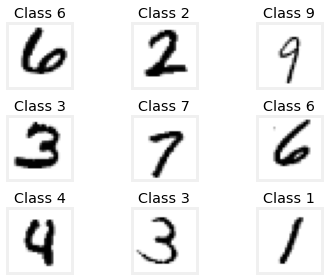

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(train_images))
    digit = train_images[num].reshape(28, 28)
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.title("Class {}".format(train_labels[num]))
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    
plt.tight_layout()
plt.show()

In [ ]:
print('Train min-max:', np.min(train_images), '-',np.max(train_images))
print('Test min-max:', np.min(train_images), '-', np.max(train_images))

Train min-max: 0 - 255
Test min-max: 0 - 255


In [ ]:
print('Train labels:', np.unique(train_labels))
print('Test labels:', np.unique(test_labels))

Train labels: [0 1 2 3 4 5 6 7 8 9]
Test labels: [0 1 2 3 4 5 6 7 8 9]


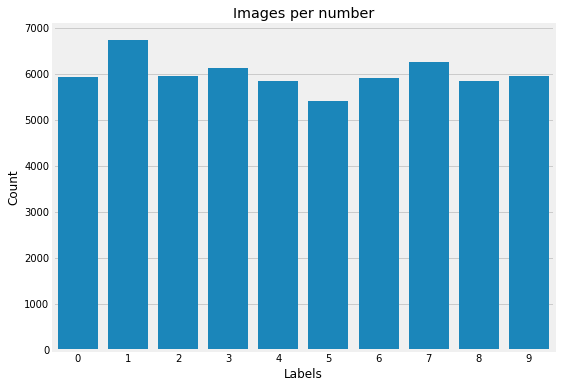

In [ ]:
number_count = np.array(np.unique(train_labels, return_counts=True)).T


plt.figure(figsize=(8, 6))
sns.barplot(x=number_count[:, 0], y=number_count[:, 1], color=palette[0])

plt.title('Images per number')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

## Preprocesado
#### 2. Convertir los datos a un formato compatible con la red (reshape)

In [ ]:
train_images = train_images.reshape((train_images.shape[0], -1))
train_labels = train_labels.reshape(-1, 1)
test_images = test_images.reshape((test_images.shape[0], -1))
test_labels = test_labels.reshape(-1,1)

In [ ]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
train_labels

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

#### 3. Normalizar los datos de entrada (de 0 a 1) 

In [ ]:
def normalize_input(images):
    print(images.shape, end=' --> ')
    images_scaled = np.interp(images, (images.min(), images.max()), (0, 1))
    print(images_scaled.shape)
    return images_scaled

In [ ]:
train_images_scaled = normalize_input(train_images)
test_images_scaled = normalize_input(test_images)

(60000, 784) --> (60000, 784)
(10000, 784) --> (10000, 784)


In [ ]:
train_images_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Modelado

#### 4. Dividir los datos en tres grupos: entrenamiento, validación y prueba

In [ ]:
train_images_scaled, val_images_scaled, train_labels, val_labels = train_test_split(
    train_images_scaled, train_labels, test_size=0.3, random_state=42
)

In [ ]:
print('Train shape:', train_images_scaled.shape)
print('Val shape:', val_images_scaled.shape)

Train shape: (42000, 784)
Val shape: (18000, 784)


In [ ]:
print('Train labels shape:', train_labels.shape)
print('Val labels shape:', val_labels.shape)

Train labels shape: (42000, 1)
Val labels shape: (18000, 1)


#### 5. Diseñar, entrenar y evaluar el desempeño de la red usando datos de prueba

In [ ]:
def create_nn(layers_list=[], activation_list=[], 
              optimizer="adam", loss='categorical_crossentropy',
              metrics=["accuracy"],
              verbose=True):
    """Create a neural networs with the passed hyperparamaters"""
    network = models.Sequential()
    network.add(layers.Dense(layers_list[0], 
                activation=activation_list[0], 
                input_shape=(train_images.shape[1],)))
    
    for lay,acti in zip(layers_list[1:],activation_list[1:]):
        network.add(layers.Dense(lay, activation=acti))

    network.add(layers.Dense(cat_train.shape[1], activation='softmax'))
    network.compile(optimizer=optimizer,
                    loss=loss,
                    metrics=metrics)
    if verbose:
        print(network.summary())
    return network

def plot_history(history, metric='accuracy', epochs=range(1, 10)):
    """Plot the learning plots of the neural network using loss and another metric."""
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    metric_train = history.history[metric]
    metric_val = history.history['val_' + metric]
    
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(14, 6))
    sns.lineplot(x=epochs, y=loss_train, label='Train loss', ax=axes[0])
    sns.lineplot(x=epochs, y=loss_val, label='Val loss', ax=axes[0])
    axes[0].set_title('Model loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    sns.lineplot(x=epochs, y=metric_train, label=f'Train {metric}', ax=axes[1])
    sns.lineplot(x=epochs, y=metric_val, label=f'Val {metric}', ax=axes[1])
    axes[1].set_title(f'Model {metric}')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel(metric.title())
    axes[1].legend()
    plt.show()


def fit_evaluate_nn(network, metric='accuracy', epochs=10, batch=50, verbose=0):
    """Fit a neural network and plot the learning curves"""
    history = network.fit(train_images_scaled, cat_train, epochs=epochs, batch_size=batch,
                          validation_data=[val_images_scaled,cat_val], verbose=verbose)
    plot_history(history, metric=metric, epochs=range(1, epochs + 1))
    print(f"Last train {metric}:", round(history.history[metric][-1], 3))
    print(f"Last validiation {metric}:", round(history.history['val_' + metric][-1], 3))


def evaluate_with_test(network, metric='accuracy', epochs=10, batch=50, verbose=0):
    print('Training...')
    history = network.fit(train_images_scaled, cat_train, epochs=epochs, batch_size=batch,
                          validation_data=[val_images_scaled,cat_val], verbose=verbose)
    print('-' * 30)
    test_loss, test_metric = network.evaluate(test_images_scaled, cat_test, verbose=0)
    print('Test loss:', round(test_loss, 3))
    print(f'Test {metric}:', round(test_metric, 3))

In [ ]:
cat_train = to_categorical(train_labels)
cat_val = to_categorical(val_labels)
cat_test = to_categorical(test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1050/1050 - 3s - loss: 0.4971 - accuracy: 0.8605 - val_loss: 0.2830 - val_accuracy: 0.9191 - 3s/epoch - 2ms/step
Epoch 2/30
1050/1050 - 2s - loss: 0.2492 - accuracy: 0.9285 - val_loss: 0.2285 - val_accuracy: 0.9344 - 2s/epoch - 2ms/step
Epoch 3/30
1050/1050 - 2s - loss: 0.2086 - accuracy: 0.9402 - val_loss: 0.2053 - val_accuracy: 0.9419 - 2s/epoch - 2ms/step
Epoch 4/30
1050/1050 - 2s - loss: 0.1832 - accuracy: 0.9463 - val_loss:

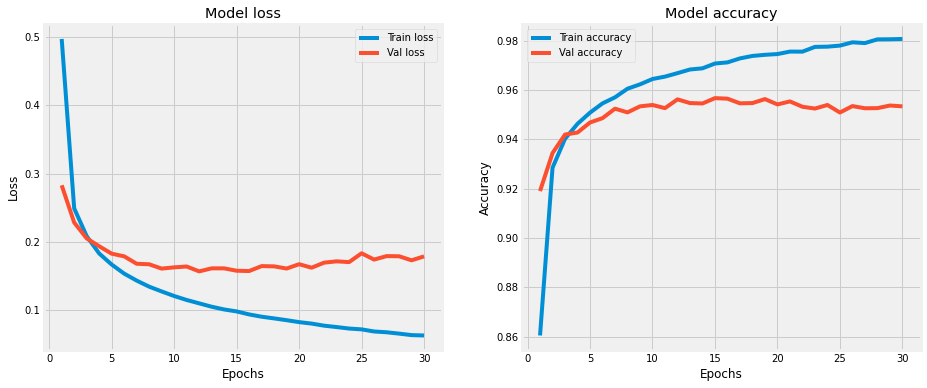

Last train accuracy: 0.981
Last validiation accuracy: 0.953
CPU times: user 1min 17s, sys: 8.68 s, total: 1min 26s
Wall time: 1min 23s


In [ ]:
%%time
hypers_baseline = {
    'layers_list': [20], 
    'activation_list': ['relu'],
    'optimizer': "adam", 
    'loss': 'categorical_crossentropy',
    'metrics': ["accuracy"]
}
network_baseline = create_nn(**hypers_baseline)
fit_evaluate_nn(network_baseline, epochs=30, batch=40, verbose=2)

In [ ]:
network_baseline = create_nn(**hypers_baseline, verbose=False)
evaluate_with_test(network_baseline, metric='accuracy', epochs=5, batch=40, verbose=0)

Training...
------------------------------
Test loss: 0.189
Test accuracy: 0.943


#### 6. Probar con diferentes arquitecturas

**Arquitectura 1:** ```3 capas (3, 2 y 4 neuronas) con activación sigmoide``` 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 2355      
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 10)                50        
                                                                 
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________
None


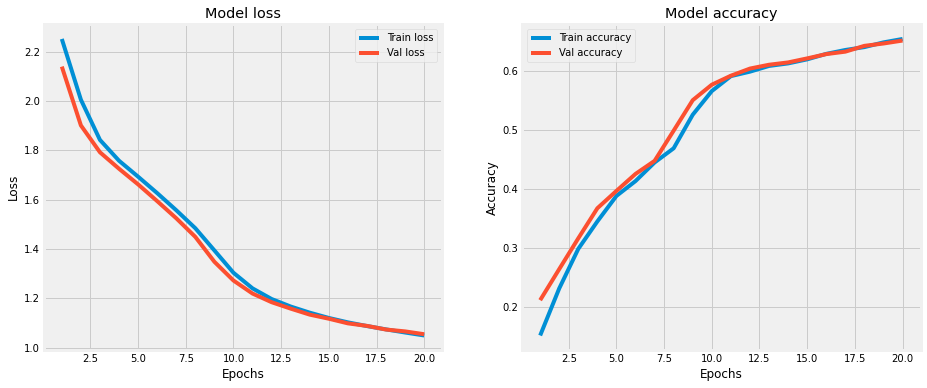

Last train accuracy: 0.655
Last validiation accuracy: 0.652
CPU times: user 54 s, sys: 5.97 s, total: 59.9 s
Wall time: 41.8 s


In [ ]:
%%time
hypers_arq1 = {
    'layers_list': [3, 2, 4], 
    'activation_list': ['sigmoid','sigmoid','sigmoid'],
    'optimizer': "adam", 
    'loss': 'categorical_crossentropy',
    'metrics': ["accuracy"]
}
network_arq1 = create_nn(**hypers_arq1)
fit_evaluate_nn(network_arq1, epochs=20, batch=40, verbose=0)

**Arquitectura 2:** ```2 capas de (10 y 5 neuronas) con activación relu``` 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________
None


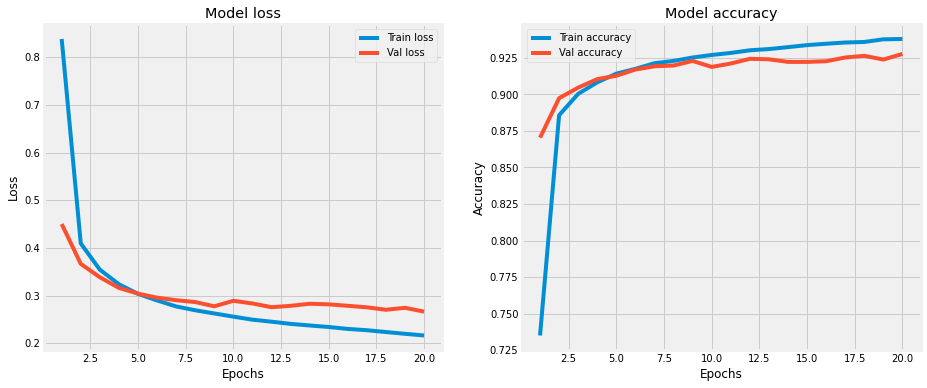

Last train accuracy: 0.938
Last validiation accuracy: 0.928
CPU times: user 53.3 s, sys: 5.69 s, total: 59 s
Wall time: 41.3 s


In [ ]:
%%time
hypers_arq2 = {
    'layers_list': [10, 5], 
    'activation_list': ['relu', 'relu'],
    'optimizer': "adam", 
    'loss': 'categorical_crossentropy',
    'metrics': ["accuracy"]
}
network_arq2 = create_nn(**hypers_arq2)
fit_evaluate_nn(network_arq2, epochs=20, batch=40, verbose=0)

**Arquitectura 3:** ```5 capas (con 5 neuronas cada una) combinando activación relu y sigmoide``` 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 3925      
                                                                 
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 5)                 30        
                                                                 
 dense_15 (Dense)            (None, 5)                 30        
                                                                 
 dense_16 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,105
Trainable params: 4,105
Non-traina

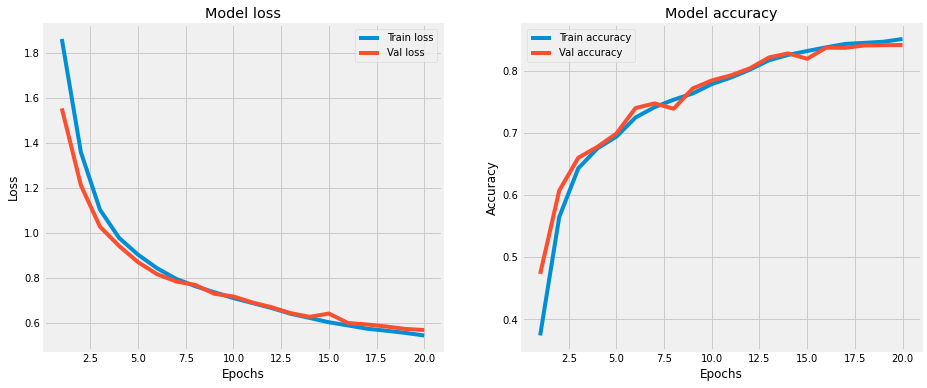

Last train accuracy: 0.852
Last validiation accuracy: 0.842
CPU times: user 58.4 s, sys: 5.74 s, total: 1min 4s
Wall time: 44.3 s


In [ ]:
%%time
hypers_arq3 = {
    'layers_list': [5, 5, 5, 5, 5], 
    'activation_list': ['relu', 'relu', 'relu', 'relu', 'sigmoid'],
    'optimizer': "adam", 
    'loss': 'categorical_crossentropy',
    'metrics': ["accuracy"]
}
network_arq3 = create_nn(**hypers_arq3)
fit_evaluate_nn(network_arq3, epochs=20, batch=40, verbose=0)

**Arquitectura 4:** ```2 capas de 50 y 20 neuronas respectivamente, con activación relu``` 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                39250     
                                                                 
 dense_18 (Dense)            (None, 20)                1020      
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________
None


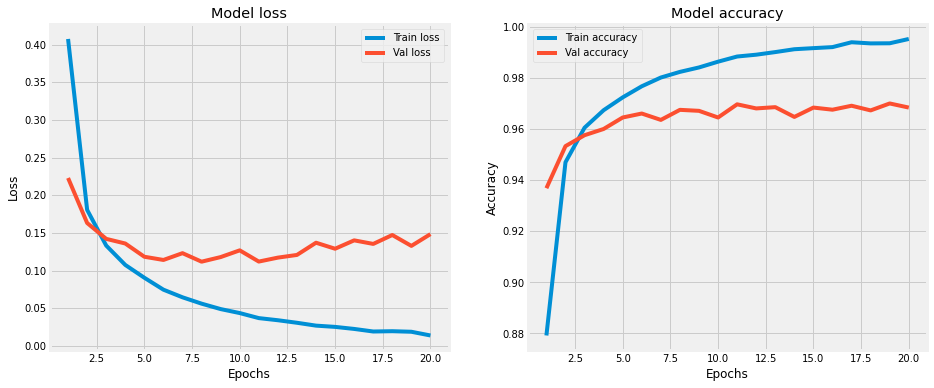

Last train accuracy: 0.995
Last validiation accuracy: 0.969
CPU times: user 1min 7s, sys: 8.48 s, total: 1min 16s
Wall time: 51.9 s


In [ ]:
%%time
hypers_arq4 = {
    'layers_list': [50, 20], 
    'activation_list': ['relu', 'relu'],
    'optimizer': "adam", 
    'loss': 'categorical_crossentropy',
    'metrics': ["accuracy"]
}
network_arq4 = create_nn(**hypers_arq4)
fit_evaluate_nn(network_arq4, epochs=20, batch=40, verbose=0)

**Arquitectura 5:** ```4 capas extenas de 512 neuronas y dos capas internas con 256 neuronas activación relu y dropout del 20%``` 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)              

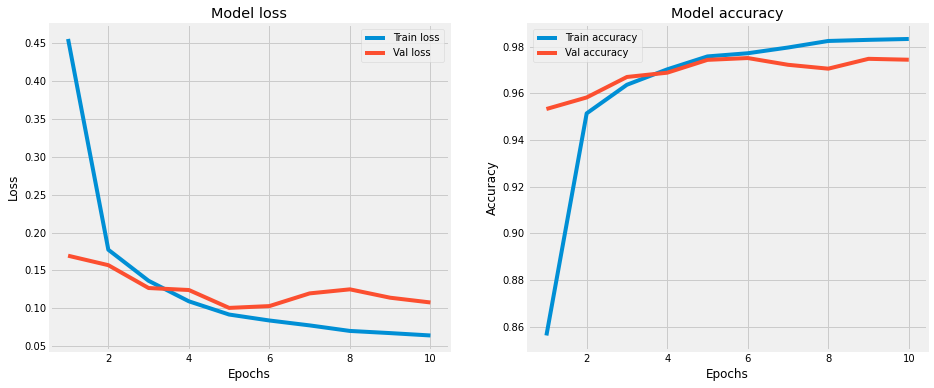

In [ ]:
model5 = models.Sequential()
model5.add(Dense(512, activation = 'relu', input_shape=(784,)))
model5.add(Dropout(0.2))
model5.add(Dense(512,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(512,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(256, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(256, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(512, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(512, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation = 'softmax'))

model5.summary()

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_5 = model5.fit(train_images_scaled, cat_train,
          batch_size=128, epochs=10, validation_data=[val_images_scaled,cat_val],
          verbose=2)

plot_history(hist_5, metric='accuracy', epochs=range(1, 11))

In [ ]:
test_loss, test_metric = model5.evaluate(test_images_scaled, cat_test, verbose=0)
print('Test loss:', round(test_loss, 3))
print('Test accuracy:', round(test_metric, 3))

Test loss: 0.1
Test accuracy: 0.975


In [ ]:
y_prob = model5.predict(test_images) 
y_classes = y_prob.argmax(axis=-1)

313/313 [==============================] - 1s 4ms/step


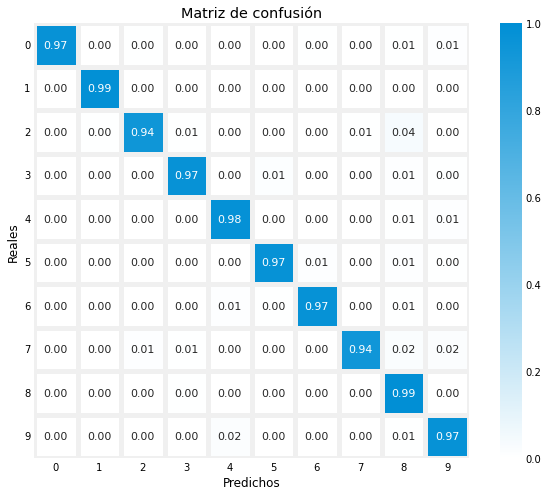

In [ ]:
conf = pd.DataFrame(
    confusion_matrix(y_classes, test_labels.reshape(-1), normalize='true'), 
    columns=range(10), 
    index=range(10)
)

plt.figure(figsize=(9, 7))
sns.heatmap(
    conf,  cbar=True, square=True, annot=True, 
    fmt= '.2f', annot_kws={'size': 11}, 
    linewidths=5, linecolor='#f0f0f0',
    cmap=lcmap.from_list("", ['#ffffff', palette[0]]),
    vmin=0, vmax=1
)
plt.title('Matriz de confusión')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.tight_layout()
plt.show()

## Conclusiones
#### 7. Discuta el resultado. ¿qué pueden concluir?

Para el caso del dataset del MNIST, al comparar los diferentes modelos testeados únicamente por las metricas de accuracy y loss en el set de entrenamiento, la mejor arquitectura corresponde al modelo 5 con un test accuracy del 0.976 el cual contiene mayor cantidad de neuronas por capa que el segundo mejor resultado en cuanto a arquitecturas, el modelo 4, con 2 capas internas y 16 neuronas, y con un test accuracy de 0.946. Sin embargo, no es adecuado fijarse unicamente en estas métricas crudas teniendo en cuenta que algunos de los modelos generados pueden estar en overfitting o underfitting; para corrobar esto es posible comparar las curvas de aprendzaje de los modelos, en el set de entremamiento y el set de validacion generado al inicio de la implementación del taller. Siendo este el caso, los mejores modelos pueden estar asociados a la arquitectura 1 y 3 cuyas curvas de aprendizaje por epoch para cada set de datos, es casi igual, pudiendo concluir para el set de validacion se esta en el punto adecuado de entrenamiento del modelo. Aún así, para estos dos casos los valores de exactitud son menores que para los casos de la arquitectura 3 y 4, en los cuales las diferencias entre los valores registrados para el set de validación y para el set de entremiento son apenas decimas, por lo que el overfitting es minimo para estos dos modelos.

Para el caso del modelo 5 se agrego de manera explicita una red con una mayor cantidad de neuronas que culquiera de los casos anteriores, además de incluir un factor de regularización dado por el dropout aleatorio de neuronas con una probabilidad del 20%. De manera que bajo estas consideraciones se encontraron algunas mejoras en los modelos cuando se asignaron mayor cantidad de neuronas por cada una de las capas asociadas además de agregar un factor de regularización explicito.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cfd5511f-3c58-46eb-a128-c220085803f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>